# TP 04 Antoine - HAZEBROUCK - GROUPE M


## Étude de cas: la plateforme Netflix

Merci de respecter scrupuleusement la structure prédéfinie (et de ne pas en ajouter).

Il y a une section par question. Répondez à toutes les sous-questions en créant autant de cellules que vous jugez nécessaires.

In [147]:
# import nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import numpy as np

# définition éventuelle des chemins nécessaires --> on ne doit plus trouver de chemin écrit en "dur" au delà de cette section ! Tous doivent faire référence à ce chemin.
chemin = './netflix_titles.csv'

### Q1: Lisez le fichier

In [148]:
netflix = pd.read_csv(chemin)

### Q2: Affichez les dimensions du dataframe

In [149]:
netflix.shape

(8807, 12)

### Q3: Comptez les films et les séries

In [150]:
netflix.groupby('type')['type'].count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

### Q4: Générez le résumé statistique du dataframe

In [151]:
netflix.describe(include='all')

# Q1

# Q2
# 8807 - 8807 = 0

# Q3
# 4528

# Q4
# 748

# Q5
netflix.groupby('country')['country'].count().max()
# 2818

2818

### Q5: les valeurs manquantes

In [152]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Q6: Les lignes dupliquées

In [153]:
netflix.duplicated().sum()


netflix = netflix.drop_duplicates(keep='first')

### Q7: Regardons les pays d'origine.

In [167]:
fr = netflix.loc[(netflix['country'].notnull()) & (netflix['country'].str.find('France') != -1)].count()['title']
us = netflix.loc[(netflix['country'].notnull()) & (netflix['country'].str.find('United States') != -1)].count()['title']

print('us = ', us)
print('fr = ', fr)

us =  3690
fr =  393


In [155]:
# il faudrait gerer les irregularité ici comme au dessus
netflix.groupby('country')['country'].count().sort_values(ascending=False).head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

### Q8: Regardons la durée des films.

In [165]:
netflix['duration_min'] = netflix['duration'].str.split(' ', expand=True)[0].astype('Int64')

films = netflix.groupby('type').get_group('Movie')

films.sort_values(ascending=False, by='duration_min').head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312


In [170]:
# les series ont supposement moins de saisons que de minutes dans un films, on laisse ce cas de coté
films_francais = netflix.loc[(netflix['country'].notnull()) & (netflix['country'].str.find('France') != -1)]

films_francais.sort_values(ascending=False, by='duration_min').head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
2843,s2844,Movie,Aurora,Cristi Puiu,"Cristi Puiu, Clara Voda, Catrinel Dumitrescu, ...","Romania, France, Switzerland, Germany","March 4, 2020",2010,TV-MA,186 min,"Dramas, International Movies","42-year-old Viorel, a distraught engineer, tak...",186
6338,s6339,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain","August 26, 2016",2013,NC-17,180 min,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ...",180
1624,s1625,Movie,The Da Vinci Code,Ron Howard,"Tom Hanks, Audrey Tautou, Ian McKellen, Jean R...","United States, Malta, France, United Kingdom","December 1, 2020",2006,PG-13,149 min,Thrillers,"When the curator of the Louvre is killed, a Ha...",149
1138,s1139,Movie,The Pianist,Roman Polański,"Adrien Brody, Thomas Kretschmann, Frank Finlay...","United Kingdom, France, Poland, Germany, Unite...","April 1, 2021",2002,R,149 min,"Dramas, Independent Movies, International Movies",Famed Polish pianist Wladyslaw Szpilman strugg...,149
1728,s1729,Movie,The Endless Trench,"Aitor Arregi, Jon Garaño, Jose Mari Goenaga","Antonio de la Torre, Belén Cuesta, Vicente Ver...","Spain, France, Canada","November 6, 2020",2019,TV-MA,148 min,"Dramas, Independent Movies, International Movies","Fearing retribution, a Republican from the Spa...",148
578,s579,Movie,Memoirs of a Geisha,Rob Marshall,"Zhang Ziyi, Ken Watanabe, Koji Yakusho, Michel...","France, Japan, United States","July 1, 2021",2005,PG-13,145 min,"Dramas, Romantic Movies","Sold to a geisha house as a child, a fisherman...",145
6205,s6206,Movie,Babel,Alejandro G. Iñárritu,"Brad Pitt, Cate Blanchett, Gael García Bernal,...","France, United States, Mexico","January 1, 2019",2006,R,143 min,"Dramas, Independent Movies",When an American couple vacationing in Morocco...,143
1153,s1154,Movie,Mandela: Long Walk to Freedom,Justin Chadwick,"Idris Elba, Naomie Harris, Tony Kgoroge, Riaad...","United Kingdom, South Africa, France","March 29, 2021",2013,PG-13,141 min,"Dramas, International Movies",This in-depth biopic portrays groundbreaking S...,141
2354,s2355,Movie,Destiny,Youssef Chahine,"Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, S...","France, Egypt","June 19, 2020",1997,TV-14,136 min,"Dramas, International Movies","In 12th-century Spain, a philosopher and his p...",136
8112,s8113,Movie,Suburra,Stefano Sollima,"Pierfrancesco Favino, Elio Germano, Claudio Am...","Italy, France","October 14, 2015",2015,NR,135 min,"Dramas, International Movies, Thrillers",A grueling battle over turning a seaside town ...,135


### Q9: Quel sont les titres de film français les plus long et quels est leur longueur ?

In [174]:
films_francais['len_title'] = films_francais['title'].str.len()

films_francais.sort_values(ascending=False, by='len_title').head(10)[['title', 'len_title']]

C:\Users\Jez\AppData\Local\Temp\ipykernel_9480\212267436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_francais['len_title'] = films_francais['title'].str.len()


,title,len_title
5659,A Christmas Special: Miraculous: Tales of Lady...,60
7293,"Les Bleus - Une autre histoire de France, 1996...",51
4705,The Guernsey Literary and Potato Peel Pie Society,49
3285,Fadily Camara : La plus drôle de tes copines,44
8102,Strawberry Shortcake: Berry Bitty Adventures,44
8096,Stop at Nothing: The Lance Armstrong Story,42
4512,Errementari: The Blacksmith and the Devil,41
2962,Miraculous: Tales of Ladybug & Cat Noir,39
1329,The Misadventures of Hedi and Cokeman,37
5720,Einsatzgruppen: The Nazi Death Squads,37


### Q10: Regardons les acteurs d'un peu plus près (colonne `cast`).

error: nothing to repeat at position 0

### Q11: Concentrons-nous sur les dates d'ajout

In [186]:
no_na_in_date_added = netflix.copy()

no_na_in_date_added = no_na_in_date_added[no_na_in_date_added['date_added'].notnull()]

no_na_in_date_added['year_added'] = no_na_in_date_added['date_added'].str.split(' ', expand=True)[2]


c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Text(0, 0.5, 'nombre de Films/Series ajoutées')

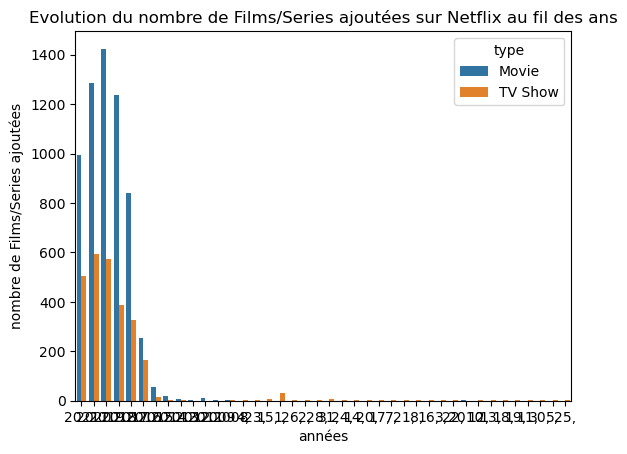

In [192]:
# group_by_type_annee = no_na_in_date_added.groupby(['year_added', 'type'])

plt.title('Evolution du nombre de Films/Series ajoutées sur Netflix au fil des ans')
plot = sns.countplot(no_na_in_date_added, x='year_added', hue='type')
plot.set_xlabel('années')
plot.set_ylabel('nombre de Films/Series ajoutées')
# je n'ai pas reussi a afficher un .lineplot avec un count en Y

### Q12: Évolution du nombre de films/séries produits par le top 10 des pays producteurs au fil des ans

In [213]:
# il faudrait gerer les irregularites des pays
# firstfilms = netflix.groupby('country')['country']

vals = no_na_in_date_added.groupby('country')['country'].count().sort_values(ascending=False).head(10)

firstfilms = ['United States', 'India', 'United Kingdom', 'Japan', '']

# films_francais.sort_values(ascending=False, by='len_title').head(10)[['title', 'len_title']]
# no_na_in_date_added[]


# plt.title('Evolution du nombre de Films/Series ajoutées sur Netflix au fil des ans')
# plot = sns.countplot(no_na_in_date_added, x='year_added', hue=firstfilms)
# plot.set_xlabel('années')
# plot.set_ylabel('nombre de Films/Series ajoutées')

country
United States     2812
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

### Q13: Étudions la distribuion de la durée des films disponibles sur Netflix.

### Q14: Étudions les séries télévisées.